In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf

In [10]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [11]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [12]:
data.shape

(200, 4)

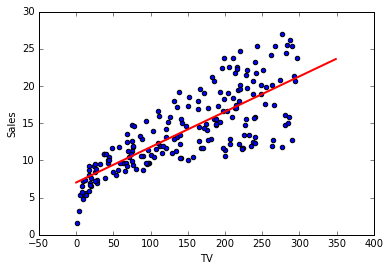

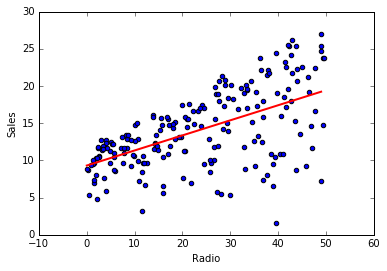

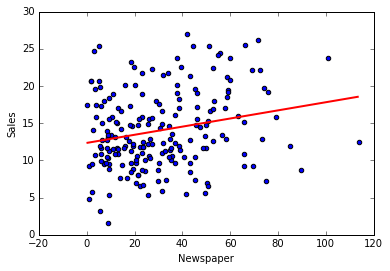

In [13]:
data.plot(kind='scatter', x='TV', y='Sales')
lm_TV = smf.ols(formula='Sales ~ TV', data=data).fit()
X_TV = pd.DataFrame({'TV': np.arange(350)})
Y_Sales_TV = lm_TV.predict(X_TV)
plt.plot( X_TV, Y_Sales_TV, c='red', linewidth=2)
plt.show()

data.plot(kind='scatter', x='Radio', y='Sales')
lm_Radio = smf.ols(formula='Sales ~ Radio', data=data).fit()
X_Radio = pd.DataFrame({'Radio' :np.arange(data.Radio.min(), data.Radio.max(), 1)})
Y_Sales_Radio = lm_Radio.predict(X_Radio)
plt.plot( X_Radio, Y_Sales_Radio, c='red', linewidth=2)
plt.show()

data.plot(kind='scatter', x='Newspaper', y='Sales')
lm_NP = smf.ols(formula='Sales ~ Newspaper', data=data).fit()
X_NP = pd.DataFrame({'Newspaper': np.arange(data.Newspaper.min(), data.Newspaper.max(), 1)})
Y_Sales_NP = lm_NP.predict(X_NP)
plt.plot( X_NP, Y_Sales_NP, c='red', linewidth=2)
plt.show()


In [14]:
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
print lm.params

Intercept    7.032594
TV           0.047537
dtype: float64


In [15]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [16]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [17]:
lm.rsquared

0.61187505085007099

In [18]:
mlm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
mlm.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [19]:
mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 10 Mar 2016   Prob (F-statistic):           4.83e-98
Time:                        09:34:12   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

training1 16.4539061232
training2 11.6251804765
0.873382950515
training3 23.4104826788
All training data  53.7096191269


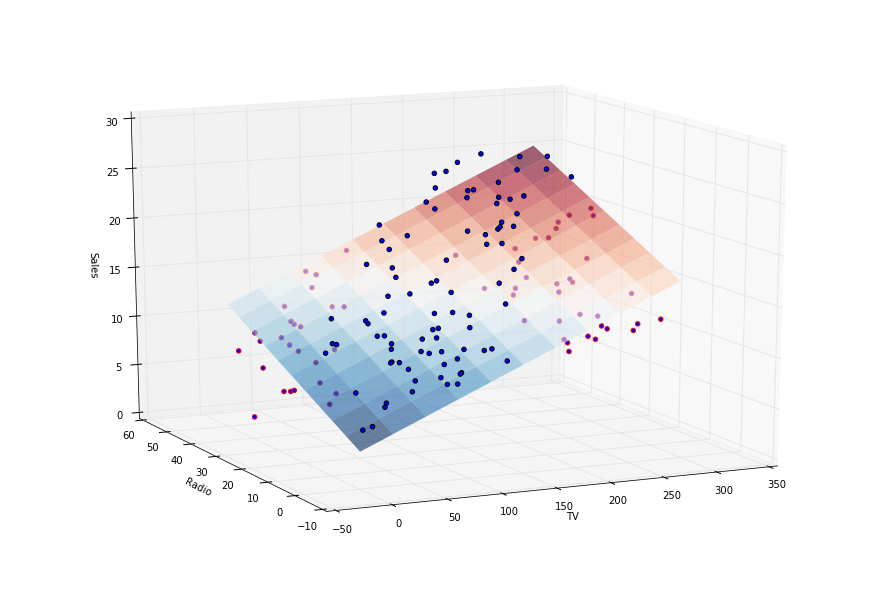

In [20]:
#training data sets 1-3

training = data.copy()
training = data.head(50)
mlm1 = smf.ols(formula='Sales ~ TV + Radio', data=training).fit()
X = pd.DataFrame(training, columns=['TV','Radio'])
NewY = mlm1.predict(X)
y = training.Sales
resid = y - NewY
cost = np.sum(resid ** 2)/( 2 * training.shape[1])
print "training1", cost

training = data.copy()
training = data.head(100).tail(50)
mlm2 = smf.ols(formula='Sales ~ TV + Radio', data=training).fit()
X = pd.DataFrame(training, columns=['TV','Radio'])
NewY = mlm2.predict(X)
y = training.Sales
resid = y - NewY
cost = np.sum(resid ** 2)/( 2 * training.shape[1])
print "training2", cost

training = data.copy()
training = data.head(150).tail(50)
mlm3 = smf.ols(formula='Sales ~ TV + Radio', data=training).fit()
print mlm3.rsquared
X = pd.DataFrame(training, columns=['TV','Radio'])
NewY = mlm3.predict(X)
y = training.Sales
resid = y - NewY
cost = np.sum(resid ** 2)/( 2 * training.shape[1])
print "training3", cost

training = data.copy()
training = data.head(150)
mlm = smf.ols(formula='Sales ~ TV + Radio', data=training).fit()
X = pd.DataFrame(training, columns=['TV','Radio'])
NewY = mlm.predict(X)
y = training.Sales
resid = y - NewY
cost = np.sum(resid ** 2)/( 2 * training.shape[1])
print "All training data ", cost

xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))

Z = mlm.params[0] + mlm.params[1] * xx1 + mlm.params[2] * (xx2 )
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='red', alpha=1.0)


ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')


17.8772669478


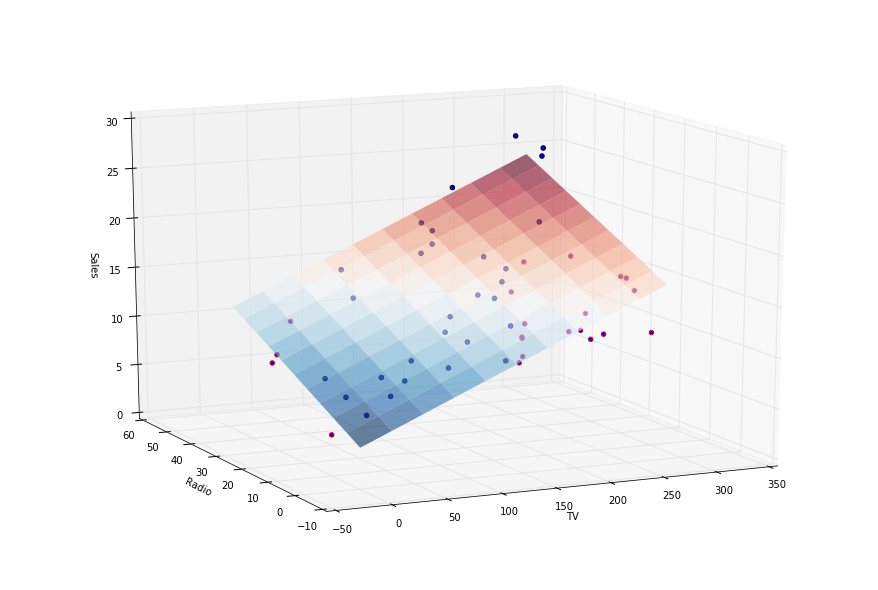

In [21]:
slic = data.copy()
slic = slic.tail(50)
slic.shape
X = pd.DataFrame(slic, columns = ['TV', 'Radio'])
testY = mlm3.predict(X)
y = slic.Sales

xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))

Z = mlm3.params[0] + mlm.params[1] * xx1 + mlm.params[2] * (xx2 )
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
resid = y - testY
cost = np.sum(resid ** 2)/( 2 * slic.shape[1]) 
print cost
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='red', alpha=1.0)


ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')


